Please **submit this Jupyter notebook through Canvas** no later than **Monday November 16, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Daniël Vink - 10675140 \
Sam Kuilboer - 12442690

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [3]:
import numpy as np

t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

General form of a straight line equation: $y = ax + b$ \
General form of a quadratic function: $y = ax^2 + bx + c$ \
General form of a cubic function: $y = ax^3 + bx^2 + cx + d$

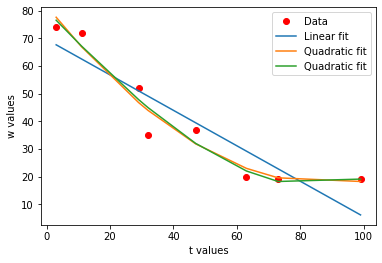

In [29]:
import numpy.linalg as la
import matplotlib.pyplot as plt

''' Data is fitted by solving the linear equation w = Ax for x.
A takes the shape of the t-values of every point on its row, with an added 1 to accommodate the added constant
from the general equation. The resulting vector x contains the fitted coefficients.
'''

# Linear fit
straight_A = np.array([t, np.ones(len(t))]).T
a_1, b_1 = la.lstsq(straight_A, w, rcond=None)[0]

# Quadratic fit
quadr_A = np.array([t**2, t, np.ones(len(t))]).T
a_2, b_2, c_2 = la.lstsq(quadr_A, w, rcond=None)[0]

# Cubic fit
cubic_A = np.array([t**3, t**2, t, np.ones(len(t))]).T
a_3, b_3, c_3, d_3 = la.lstsq(cubic_A, w, rcond=None)[0]

# Plot
plt.plot(t, w, 'ro', label='Data points')
plt.plot(t, a_1*t + b_1, label='Linear fit')
plt.plot(t, a_2*t**2 + b_2*t + c_2, label='Quadratic fit')
plt.plot(t, a_3*t**3 + b_3*t**2 + c_3*t + d_3, label='Cubic fit')
plt.legend()
plt.ylabel("w values")
plt.xlabel("t values")
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [31]:
''' Because the order is unspecified, we calculated the 2nd order condition number of the above 
created A (Vandermonde) matrices. 
'''
cond_linear = la.cond(straight_A)
cond_quadr = la.cond(quadr_A)
cond_cubic = la.cond(cubic_A)

print('Condition number (2nd Order) of the linear Vandermonde-matrix: ', cond_linear)
print('Condition number (2nd Order) of the quadratic Vandermonde-matrix: ', cond_quadr)
print('Condition number (2nd Order) of the cubic Vandermonde-matrix: ', cond_cubic)

print('As you can see, the matrices are poorly conditioned and can lead to large errors.')

Condition number (2nd Order) of the linear Vandermonde-matrix:  95.97978844376208
Condition number (2nd Order) of the quadratic Vandermonde-matrix:  10562.214789189062
Condition number (2nd Order) of the cubic Vandermonde-matrix:  1192946.877148659
As you can see, the matrices are poorly conditioned and can lead to large errors.


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

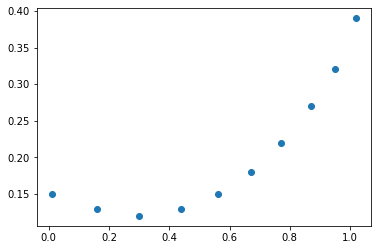

In [100]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

import matplotlib.pyplot as plt
t = np.linspace(0, 2*np.pi, 101)

plt.scatter(x,y)
plt.show()

In [95]:
ellips_A = np.array([y**2, x*y, x, y, np.ones(len(x))]).T
a, b, c, d, e = la.lstsq(ellips_A, x**2, rcond=None)[0]
print('Coefficients: ')
print('a: ', a)
print('b: ', b)
print('c: ', c)
print('d: ', d)
print('e: ', e)

Coefficients: 
a:  -2.6356254837121007
b:  0.14364618259889303
c:  0.5514469631403579
d:  3.2229403381058948
e:  -0.4328942702644502


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

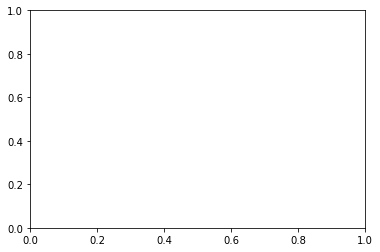

In [101]:
# We need sympy to solve the ellipse equation for y.
from sympy import *

def solve_for_y(a, b, c, d, e):
    ''' Solves the ellipse equation for the variable y.
    First it solves the equation for 0 and then for y with the given coefficients. Returns two functions
    since for every value of x, this equation has two values for y. 
    '''
    x, y = symbols('x y')
    # Solve ellipse for 0, so pull x**2 to the left side of the equation.
    ellipse = a*y**2 + b*x*y + c*x + d*y + e - x**2
    solutions = solve(ellipse, y)
    # Solution gives the equations for the two possible values.
    f0 = lambdify([x], solutions[0])
    f1 = lambdify([x], solutions[1])
    return f0, f1

f0, f1 = solve_for_y(a, b, c, d, e)
t = np.linspace(-0.5, 1.2, 201) # Space of x for to solve the equation for.
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)


plt.scatter(x, y, 'ro', label='Data')
plt.plot(t, f0(t), label='LSQ fit')
plt.plot(t, f1(t), label='LSQ fit upper data')
plt.legend()
plt.show()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## (c)
Can you explain this behaviour?

YOUR ANSWER HERE

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()